In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import quad

In [2]:
class Point:
    x: float
    y: float

    def __init__(self, point: (float, float)):
        self.x, self.y = point


class LinearBounds:
    lower: float
    higher: float

    def __init__(self, lower: float, higher: float):
        self.lower = lower
        self.higher = higher

    def length(self) -> float:
        return self.higher - self.lower

    def get_random_value(self) -> float:
        return random.uniform(self.lower, self.higher)


class Bounds:
    x: LinearBounds
    y: LinearBounds

    def __init__(self, x: LinearBounds, y: LinearBounds):
        self.x = x
        self.y = y

    def area(self) -> float:
        return self.x.length() * self.y.length()

    def get_random_point(self) -> Point:
        return Point((self.x.get_random_value(), self.y.get_random_value()))

In [3]:
def getRealIntegral(f, bounds: LinearBounds) -> float:
    return quad(f, bounds.lower, bounds.higher)[0]

In [4]:
def getIsInside(f, p: Point) -> bool:
    y_0: float = f(p.x)
    if abs(y_0) > abs(p.y) and y_0*p.y >= 0:
        return True

    return False

In [5]:
def function(x: float) -> float:
    return x**2-3

bounds = Bounds(LinearBounds(-1, 4), LinearBounds(-4, 15))

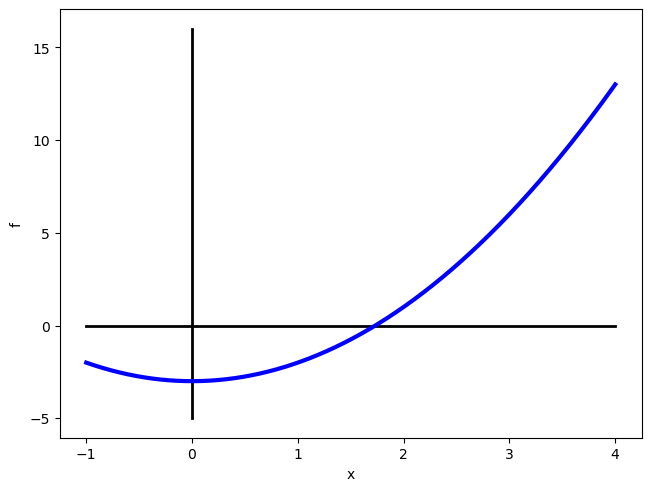

In [6]:
fig, axs = plt.subplot_mosaic([['linear-linear']], layout='constrained')
ax = axs['linear-linear']
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel('x')
ax.set_ylabel('f')
samples = np.linspace(bounds.x.lower, bounds.x.higher, 10000)
ax.plot([bounds.x.lower, bounds.x.higher], [0, 0], "k", linewidth=2)
ax.plot([0, 0], [bounds.y.lower - 1, bounds.y.higher + 1], "k", linewidth=2)

ax.plot(samples, function(samples), color="blue", linewidth=3)

The approximated Integral of the function is: 6.74500
The real Integral of the function is: 6.66667
That's an error of 0.08 or 1.17500% 
And the whole thing took 0.52917 Seconds for 1000 samples


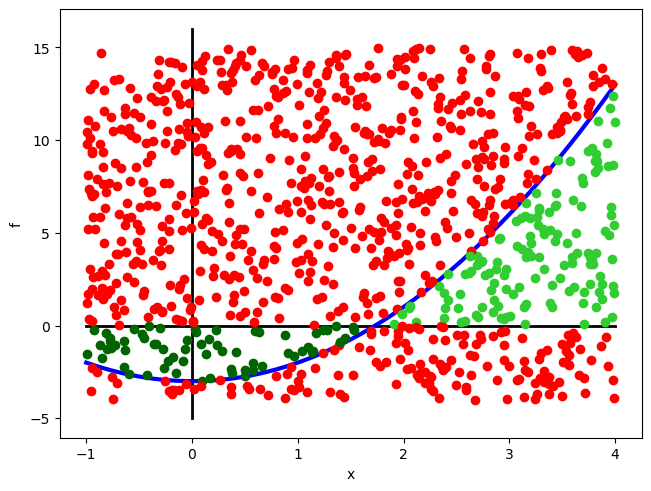

In [7]:
startTime = time.time()
pointsInside: int = 0
samples: int = 10**3

for i in range(samples):
    toTestPoint = bounds.get_random_point()
    if getIsInside(function, toTestPoint):
        if toTestPoint.y >= 0:
            pointsInside += 1
            ax.plot(toTestPoint.x, toTestPoint.y, "o", color="limegreen")
        else:
            pointsInside -= 1
            ax.plot(toTestPoint.x, toTestPoint.y, "o", color="darkgreen")
    else:
        ax.plot(toTestPoint.x, toTestPoint.y, "ro")

integral = (pointsInside / samples) * bounds.area()
print(f"The approximated Integral of the function is: {integral:.5f}")

real_value: float = getRealIntegral(function, bounds.x)
print(f"The real Integral of the function is: {real_value:.5f}")

error: float = abs(real_value-integral)
print(f"That's an error of {error:.2f} or {(error/real_value)*100:.5f}% ")

print(f"And the whole thing took {time.time()-startTime:.5f} Seconds for {samples} samples")

fig